# Megaline Telecom

- [Megaline Telecom](#scrollTo=WvTQ-2Oqj4q_)
    - [Initialization](#scrollTo=bg9VNXf6j4rH)
    - [Load all Data](#scrollTo=jDBGBh50j4rL)
        - [Users](#scrollTo=WnIOyk0gj4rO)
            - [Fix Data](#scrollTo=fcTItMFqj4rS)
        - [Calls](#scrollTo=fVd2fz5ej4rT)
            - [Fix Data](#scrollTo=gl726Qczj4rW)
            - [Enrich Data](#scrollTo=BKQO4BM6j4rX)
        - [Messages](#scrollTo=k8qQGJlAj4rd)
            - [Fix Data](#scrollTo=iUU4Yctyj4rm)
            - [Enrich Data](#scrollTo=g3PlF8Q9j4rn)
        - [Internet](#scrollTo=MNB9faJij4rq)
            - [Fix Data](#scrollTo=Ot0t5pdUj4rt)
            - [Enrich Data](#scrollTo=z2XqfesTj4ru)
        - [Plans](#scrollTo=b3DWeyiFj4rw)
    - [Study plan conditions](#scrollTo=8OqPU_VSj4ry)
        - [Calls](#scrollTo=IpeCQxE-j4rz)
        - [Messages](#scrollTo=g35ocEe2j4r1)
        - [Internet](#scrollTo=C9_jOz0Ij4r3)
        - [Create new dataframe](#scrollTo=wgavlRIrj4r6)
        - [Calculate monthly revenue](#scrollTo=wUzzyCNZj4r_)
    - [Study Costumer Behavior](#scrollTo=kzGMBq04j4sC)
        - [Calls Duration](#scrollTo=t7JHgxdaj4sE)
        - [Messages Sent](#scrollTo=-qgP6x-rj4sQ)
        - [Data Used](#scrollTo=rbet-dwWj4sY)
        - [Revenue](#scrollTo=EOId3l7Oj4sh)
    - [Test statistical hyposthesis](#scrollTo=T_Nz0mNmj4sq)
- [Conclusion](#scrollTo=UH9sd6tOj4s0)



# Telecom Plan Anlysis

As an analyst for the telecom operator Megaline, the company offers its clients two prepaid plans, Surf and Ultimate. The marketing department wants to discover which plans generate more revenue to adjust the advertising budget.
We Will conduct a preliminary analysis of the plans based on a relatively small client selection. 

We will have the data on 500 Megaline clients: who they are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Our job is to analyze the clients' behavior and determine which prepaid plan generates more revenue.

**The purpose of this project is:**
1. Analyze users behavior
2. Calculate the mean, variance and standard deviation
3. Visualize the data and describe the distribution

**Test the hypothesis:**
- The average income of users of Ultimate and Surf phone plans is different.
- The average income of users in the NY-NJ area differs from that of users from other regions.

## Initialization

In [1]:
# Loading libraries

import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mt

## Load all Data

In [2]:
# Load all the DataFrames
calls = pd.read_csv('/content/megaline_calls.csv') 
internet = pd.read_csv('/content/megaline_internet.csv')
messages = pd.read_csv('/content/megaline_messages.csv')
plans = pd.read_csv('/content/megaline_plans.csv')
users = pd.read_csv('/content/megaline_users.csv')

We have 5 dataframes. Next step we are going to describe our datasets.

### Users

Tabel users (data pengguna):
<br>`user_id` — ID pengguna
<br>`first_name` — nama depan pengguna
<br>`last_name` — nama belakang pengguna
<br>`age` — usia pengguna (tahun)
<br>`reg_date` — tanggal mulai berlangganan (dd, mm, yy)
<br>`churn_date` — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, paket 
                   layanan sedang digunakan saat data ini dibuat)
<br>`city` — kota tempat tinggal pengguna
<br>`plan` — nama paket telepon

In [3]:
# Show the sample of data
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [4]:
# Show information from users dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


- The dataframe has 500 entries and 8 columns.
- The churn_date and the reg_date columns are currently represent as an object.
- There are some missing values on the churn_date columns.

In [5]:
# Checking missing value
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

They are 466 missing values in churn_date, but fill the missing values it's not necessary because the missing values indicate that clients still using our service.

#### Fix Data

In [6]:
# convert data to timestamp
for i in ('reg_date', 'churn_date'):
    users[i] = pd.to_datetime(users[i], format='%Y-%m-%d')
    print(users[i].dtype)

datetime64[ns]
datetime64[ns]


Convert `reg_date` and `churn_date` column to timestamp format

### Calls

Tabel calls (data panggilan):
<br>`id` — ID sesi web unik
<br>`call_date` — tanggal panggilan
<br>`duration` — durasi panggilan (dalam menit)
<br>`user_id` — ID pengguna yang melakukan panggilan

In [7]:
# Show the sample of data
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [8]:
# Show information from calls dataset
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


- There are 137735 rows and 4 columns on the calls dataframe.
- The call_date columns are currently displayed as an object.
- There is no missing value on the calls dataframe.

Kita akan mengubah type dari kolom call_date ke format Timestamp dan menambahkan beberapa kolom baru untuk untuk melakukan analisis lanjutan.

#### Fix Data

In [9]:
# Convert data to timestamp
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['call_date'].dtype

dtype('<M8[ns]')

Convert date in the column call_date to timestamp format.

#### Enrich Data

In [10]:
# Create 'call_month' column from 'call_date'
calls['month'] = calls['call_date'].dt.month
calls['year'] = calls['call_date'].dt.year                    
calls['year_month'] = calls['year'].astype('str') + '_' + calls['month'].astype('str')
calls.head()

,id,user_id,call_date,duration,month,year,year_month
0,1000_93,1000,2018-12-27,8.52,12,2018,2018_12
1,1000_145,1000,2018-12-27,13.66,12,2018,2018_12
2,1000_247,1000,2018-12-27,14.48,12,2018,2018_12
3,1000_309,1000,2018-12-28,5.76,12,2018,2018_12
4,1000_380,1000,2018-12-30,4.22,12,2018,2018_12


We will add a new column called month, based on the call_date column to indicate when the call occurred. Kita juga membuat kolom `year_month` untuk mengantisipasi jika ada tahun lain dalam data untuk meminimalisir kesalahan.

In [11]:
# Check the amount of missed calls
calls[calls['duration'] == 0.0]

,id,user_id,call_date,duration,month,year,year_month
19,1001_4,1001,2018-12-05,0.0,12,2018,2018_12
25,1001_13,1001,2018-12-24,0.0,12,2018,2018_12
31,1001_30,1001,2018-10-17,0.0,10,2018,2018_10
32,1001_31,1001,2018-11-03,0.0,11,2018,2018_11
34,1001_35,1001,2018-12-21,0.0,12,2018,2018_12
...,...,...,...,...,...,...,...
137714,1499_183,1499,2018-11-10,0.0,11,2018,2018_11
137715,1499_184,1499,2018-09-15,0.0,9,2018,2018_9
137720,1499_189,1499,2018-12-27,0.0,12,2018,2018_12
137722,1499_191,1499,2018-12-24,0.0,12,2018,2018_12


We decided to remove the value on the duration column with 0 value.

In [12]:
# Remove duration with value 0.0
calls = calls.query('duration != 0.0')
calls[calls['duration'] == 0.0]

,id,user_id,call_date,duration,month,year,year_month


The null values has been removed from the calls dataframe.

In [13]:
# Membuat fungsi untuk membulatkan durasi panggilan menjadi menit
calls['duration'] = np.ceil(calls['duration']).astype(int)
calls.head()

<ipython-input-13-2efff2548a53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls['duration'] = np.ceil(calls['duration']).astype(int)


,id,user_id,call_date,duration,month,year,year_month
0,1000_93,1000,2018-12-27,9,12,2018,2018_12
1,1000_145,1000,2018-12-27,14,12,2018,2018_12
2,1000_247,1000,2018-12-27,15,12,2018,2018_12
3,1000_309,1000,2018-12-28,6,12,2018,2018_12
4,1000_380,1000,2018-12-30,5,12,2018,2018_12


Sesuai dengan ketentuan yang ditetapkan dari operator setiap panggilan akan dibulatkan ke atas meskipun panggilan tersebut hanya berdurasi 1 detik, panggilan tersebut akan tetap dihitung selama menjadi 1 menit.

### Messages

Tabel messages (data SMS):
<br>`id` — ID SMS unik
<br>`message_date` — tanggal SMS dikirim
<br>`user_id` — ID pengguna yang mengirim SMS

In [14]:
# Show the sample of data
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [15]:
# Show information from messages dataset
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


- The dataframe has 76051 rows and 3 columns.
- The message_date is currently shown as object.
- The dataframe has no missing value.

Kita akan mengubah type dari kolom message_date ke format Timestamp dan menambahkan beberapa kolom baru untuk untuk melakukan analisis lanjutan.

#### Fix Data

In [16]:
# Convert data to timestamp
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['message_date'].dtype

dtype('<M8[ns]')

The message_date column on the dataframe represent as object we will convert the its column to timestamp.

#### Enrich Data

In [17]:
# Create 'message_month' column from 'message_date'
messages['month'] = messages['message_date'].dt.month
messages['year'] = messages['message_date'].dt.year                    
messages['year_month'] = messages['year'].astype('str') + '_' + messages['month'].astype('str')
messages.head()

,id,user_id,message_date,month,year,year_month
0,1000_125,1000,2018-12-27,12,2018,2018_12
1,1000_160,1000,2018-12-31,12,2018,2018_12
2,1000_223,1000,2018-12-31,12,2018,2018_12
3,1000_251,1000,2018-12-27,12,2018,2018_12
4,1000_255,1000,2018-12-26,12,2018,2018_12


We will add a new column called month, its represent the month based the message_date column. Kita juga membuat kolom `year_month` untuk mengantisipasi jika ada tahun lain dalam data untuk meminimalisir kesalahan.

### Internet

Tabel internet (data sesi web):
<br>`id` — ID sesi web unik
<br>`mb_used` — volume data yang dihabiskan selama sesi (dalam megabita)
<br>`session_date` — tanggal sesi web
<br>`user_id` — ID pengguna

In [18]:
# Show the sample of data
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [19]:
# Show information from internet dataset
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


- The dataframe have 104825 rows and 4 columns.
- The session_date columns are currently printed as an object
- The dataframe has no missing value.

Kita akan mengubah type dari kolom session_date ke format Timestamp dan menambahkan beberapa kolom baru untuk untuk melakukan analisis lanjutan.

#### Fix Data

In [20]:
# Convert data to timestamp
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['session_date'].dtype

dtype('<M8[ns]')

We convert the data on the session_date column as object to timestamp format.

#### Enrich Data

In [21]:
# Create 'session_month' column from 'session_date'
internet['month'] = internet['session_date'].dt.month
internet['year'] = internet['session_date'].dt.year                    
internet['year_month'] = internet['year'].astype('str') + '_' + internet['month'].astype('str')
internet.head()

,id,user_id,session_date,mb_used,month,year,year_month
0,1000_13,1000,2018-12-29,89.86,12,2018,2018_12
1,1000_204,1000,2018-12-31,0.00,12,2018,2018_12
2,1000_379,1000,2018-12-28,660.40,12,2018,2018_12
3,1000_413,1000,2018-12-26,270.99,12,2018,2018_12
4,1000_442,1000,2018-12-27,880.22,12,2018,2018_12


Because the analysis needs the month column, we will create a new column named month to capture the month of the internet access. Kita juga membuat kolom `year_month` untuk mengantisipasi jika ada tahun lain dalam data untuk meminimalisir kesalahan.

In [22]:
# Menampilkan informasi dataset internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
 5   year          104825 non-null  int64         
 6   year_month    104825 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.6+ MB


### Plans

Tabel plans (data paket telepon):
<br>`plan_name` — nama paket telepon
<br>`usd_monthly_fee` — biaya bulanan dalam dolar AS
<br>`minutes_included` — alokasi menit panggilan bulanan
<br>`messages_included` — alokasi SMS bulanan
<br>`mb_per_month_included` — alokasi volume data bulanan (dalam megabita)
<br>`usd_per_minute` — harga per menit jika telah melebihi batas alokasi paket (misalnya, jika paket memiliki 
                       alokasi 100 menit, maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
<br>`usd_per_message` — harga per SMS jika telah melebihi batas alokasi paket
<br>`usd_per_gb` — harga per ekstra gigabita data jika telah melebihi batas alokasi paket (1 GB = 1024 megabita)

In [23]:
# Show the sample of data
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [24]:
# Show information from plans dataset
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


## Study plan conditions

### Calls

In [25]:
# Show the amount of each user number of calls

calls_per_user_per_month = calls.pivot_table(index=['user_id', 'year_month'], 
                                  values='duration', 
                                  aggfunc=['sum', 'count'])

calls_per_user_per_month = calls_per_user_per_month.reset_index()
calls_per_user_per_month.columns = ['user_id', 'year_month', 'length_call', 'num_call',]
calls_per_user_per_month

,user_id,year_month,length_call,num_call
0,1000,2018_12,124,16
1,1001,2018_10,393,47
2,1001,2018_11,426,49
3,1001,2018_12,412,46
4,1001,2018_8,182,22
...,...,...,...,...
2251,1498,2018_9,363,39
2252,1499,2018_10,385,41
2253,1499,2018_11,308,39
2254,1499,2018_12,496,56


Kita telah membuat pivot table per panggilan dalam satu bulan yang dilakukan dari masing-masing pengguna.

### Messages

In [26]:
# Calculate the number of messages sent per month

messages_per_user_per_month = messages.pivot_table(index = ['user_id', 'year_month'], 
                                  values = 'message_date', 
                                  aggfunc= 'count')

messages_per_user_per_month = messages_per_user_per_month.reset_index()
messages_per_user_per_month.columns = ['user_id', 'year_month', 'num_message']
messages_per_user_per_month

,user_id,year_month,num_message
0,1000,2018_12,11
1,1001,2018_10,53
2,1001,2018_11,36
3,1001,2018_12,44
4,1001,2018_8,30
...,...,...,...
1801,1496,2018_11,13
1802,1496,2018_12,11
1803,1496,2018_8,2
1804,1496,2018_9,21


Kita telah membuat pivot tabel dari jumlah pesan yang dikirimkan oleh masing-masing pengguna dalam satu bulan.

### Internet

In [27]:
# Calculate the data volume used per month

internet_volume_per_user_per_month = internet.pivot_table(index = ['user_id', 'year_month'], 
                                  values = 'mb_used', 
                                  aggfunc= 'sum')

internet_volume_per_user_per_month = internet_volume_per_user_per_month.reset_index()

internet_volume_per_user_per_month.columns = ['user_id', 'year_month', 'gb_used']

internet_volume_per_user_per_month

,user_id,year_month,gb_used
0,1000,2018_12,1901.47
1,1001,2018_10,22330.49
2,1001,2018_11,18504.30
3,1001,2018_12,19369.18
4,1001,2018_8,6919.15
...,...,...,...
2272,1498,2018_9,22827.28
2273,1499,2018_10,19492.43
2274,1499,2018_11,16813.83
2275,1499,2018_12,22059.21


Kita menampilkan pivot table dari penggunaan data internet oleh masing-masing pengguna dalam satu bulan.

In [28]:
internet_volume_per_user_per_month['gb_used'] = np.ceil(internet_volume_per_user_per_month['gb_used']/1024)

internet_volume_per_user_per_month

,user_id,year_month,gb_used
0,1000,2018_12,2.0
1,1001,2018_10,22.0
2,1001,2018_11,19.0
3,1001,2018_12,19.0
4,1001,2018_8,7.0
...,...,...,...
2272,1498,2018_9,23.0
2273,1499,2018_10,20.0
2274,1499,2018_11,17.0
2275,1499,2018_12,22.0


Kita telah mengubah satuan penggunaan dari `mb` menjadi `gb`, kita juga telah membulatkan jumlah pemakaian keatas.

### Create new dataframe

In [29]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

df = calls_per_user_per_month.merge(messages_per_user_per_month, on=['user_id', 'year_month'], how='outer') 
                                
df = df.merge(internet_volume_per_user_per_month, on=['user_id', 'year_month'], how='outer') 

df

,user_id,year_month,length_call,num_call,num_message,gb_used
0,1000,2018_12,124.0,16.0,11.0,2.0
1,1001,2018_10,393.0,47.0,53.0,22.0
2,1001,2018_11,426.0,49.0,36.0,19.0
3,1001,2018_12,412.0,46.0,44.0,19.0
4,1001,2018_8,182.0,22.0,30.0,7.0
...,...,...,...,...,...,...
2288,1407,2018_11,NaN,NaN,1.0,1.0
2289,1482,2018_10,NaN,NaN,2.0,NaN
2290,1094,2018_10,NaN,NaN,NaN,2.0
2291,1108,2018_12,NaN,NaN,NaN,1.0


Kita membuat dataframe baru yang akan kita gunakan untuk melakukan analisis.

<div class="alert alert-warning">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Daripada menggunakan `lkey` dan `rkey` bisa menggunakan `on` karena di dua tabel yang di merge sudah sama.

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Terima kasih, akan saya terapkan dan menggantinya menggunakan `on`. 
</div>

In [30]:
# Add the plan information

df = df.merge(users, on='user_id', how='left')

df

,user_id,year_month,length_call,num_call,num_message,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,2018_12,124.0,16.0,11.0,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,2018_10,393.0,47.0,53.0,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,2018_11,426.0,49.0,36.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,2018_12,412.0,46.0,44.0,19.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,2018_8,182.0,22.0,30.0,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1407,2018_11,NaN,NaN,1.0,1.0,Tristan,Daugherty,27,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-29,ultimate,NaT
2289,1482,2018_10,NaN,NaN,2.0,NaN,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaT
2290,1094,2018_10,NaN,NaN,NaN,2.0,Walter,Petersen,54,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-30,surf,2018-12-12
2291,1108,2018_12,NaN,NaN,NaN,1.0,Porfirio,Kane,45,"Salt Lake City, UT MSA",2018-12-30,ultimate,NaT


Kita menggabungkan tabel df dan tabel plans untuk mengetahui paket apa yang digunakan oleh tiap pengguna.

In [31]:
# Remove first_name and last_name collumns
df = df.drop(['first_name', 'last_name', 'age'], axis=1)
df.head()

,user_id,year_month,length_call,num_call,num_message,gb_used,city,reg_date,plan,churn_date
0,1000,2018_12,124.0,16.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,2018_10,393.0,47.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1001,2018_11,426.0,49.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
3,1001,2018_12,412.0,46.0,44.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
4,1001,2018_8,182.0,22.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT


Kita menghapus kolom yang tidak diperlukan untuk analisis

In [32]:
# Print the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      2293 non-null   int64         
 1   year_month   2293 non-null   object        
 2   length_call  2256 non-null   float64       
 3   num_call     2256 non-null   float64       
 4   num_message  1806 non-null   float64       
 5   gb_used      2277 non-null   float64       
 6   city         2293 non-null   object        
 7   reg_date     2293 non-null   datetime64[ns]
 8   plan         2293 non-null   object        
 9   churn_date   158 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 197.1+ KB


There is some column that has missing values, then lets us fill the missing value with 0 except the churn_date column.

In [33]:
# Fillna missing values with 0
for i in ('num_call', 'length_call', 'num_message', 'gb_used'):
    df[i] = df[i].fillna(0)

In [34]:
# print the dataframe infromation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      2293 non-null   int64         
 1   year_month   2293 non-null   object        
 2   length_call  2293 non-null   float64       
 3   num_call     2293 non-null   float64       
 4   num_message  2293 non-null   float64       
 5   gb_used      2293 non-null   float64       
 6   city         2293 non-null   object        
 7   reg_date     2293 non-null   datetime64[ns]
 8   plan         2293 non-null   object        
 9   churn_date   158 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 197.1+ KB


We have already fill the missing values in the datasets.

### Calculate monthly revenue

In [35]:
# Menampilkan dataframe plans
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [36]:
# Create function to calculate monthly revenue

def revenue(row):
    messages = row['num_message']  # We define rows and columns from data on our measurements
    duration = row['length_call']
    gb = row['gb_used']
    plan = row['plan']
    
    package_overlimit = 0  # Define some variables to count income 
    message_overlimit = 0
    internet_overlimit = 0
    calls_overlimit = 0
   
    # In the next block of the function we need to describe a logic expression to calculate the traffic 
    # If it exceeds the usage limit, then the user who is charged the tariff exceeds the limit
    if plan == 'surf':
        package_cost = 20
        if duration > 500:
            calls_overlimit = (duration - 500) * 0.3
        if messages > 50:
            message_overlimit = (messages - 50) * 0.3
        if gb > 15:
            internet_overlimit = (gb - 15) * 10
              
    
    elif plan == 'ultimate':
        package_cost = 70
        if duration > 3000:
            calls_overlimit = (duration - 3000) * 0.1
        if messages > 1000:
            message_overlimit = (messages - 1000) * 0.1    
        if gb > 30:
            internet_overlimit = (gb - 30) * 7        

    # Finally, add up all those values to get a total revenue         
    total_bill = package_cost + calls_overlimit + message_overlimit + internet_overlimit
    
    return total_bill 

We will calculate the total volume of data used by each customer every month.

In [37]:
# Apply function to our data and create a new column to return the result
df['revenue'] = df.apply(revenue, axis=1)
df.head()

,user_id,year_month,length_call,num_call,num_message,gb_used,city,reg_date,plan,churn_date,revenue
0,1000,2018_12,124.0,16.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,70.0
1,1001,2018_10,393.0,47.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,90.9
2,1001,2018_11,426.0,49.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,60.0
3,1001,2018_12,412.0,46.0,44.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,60.0
4,1001,2018_8,182.0,22.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,20.0


We added a new column called revenue to calculate monthly revenue from every user.

## Study Costumer Behavior

In [38]:
# Print the amount of each plan
plan_pivot = df.pivot_table(index='plan', values='user_id', aggfunc=['count']).reset_index()
plan_pivot

,plan,count
,,user_id
0,surf,1573
1,ultimate,720


In [39]:
# Filter data by plans
df_surf = df.query('plan == "surf"')
df_ultimate = df.query('plan == "ultimate"')

We will create two new dataframes to split ultimate plan users and surf plan users.

### Calls Duration

In [40]:
# Print the amount of calls duration each plan per month
call_duration_pivot = df.pivot_table(index=['plan', 'year_month'], values='length_call', aggfunc='mean').reset_index()
call_duration_pivot

,plan,year_month,length_call
0,surf,2018_1,203.000000
1,surf,2018_10,429.729958
2,surf,2018_11,423.325088
3,surf,2018_12,473.836478
4,surf,2018_2,297.000000
5,surf,2018_3,330.000000
6,surf,2018_4,351.540000
7,surf,2018_5,399.584416
8,surf,2018_6,431.298969
9,surf,2018_7,449.983471


Show the total revenue from each month from two plans.

In [41]:
# Create barplot function
sns.set()

def barplot (a, b, c, d):
    colors = ['#69b3a2', '#4374B3']
    sns.set_palette(sns.color_palette(colors))
    plt.figure(figsize=(12,6))
    sns.barplot(x='year_month', y=b, hue='plan', data=a)
    plt.xlabel('Month')
    plt.ylabel(c)
    plt.title(d)
    plt.show()

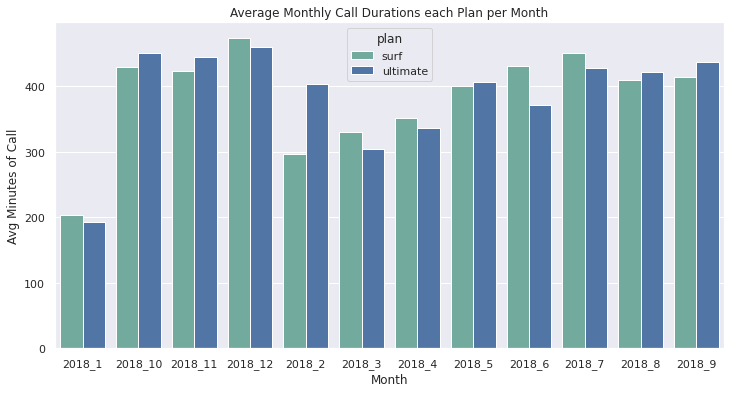

In [42]:
# Show barplot from call duration
barplot(call_duration_pivot, 'length_call', 'Avg Minutes of Call', 'Average Monthly Call Durations each Plan per Month')

We can see based on the histogram; we get overviews:
- The histogram has increased in the first few months, and the histogram gets stable after half a year.
- The average users spent 400 minutes on calls every month.
- One of the plans is not always be higher than the other plan.

In [43]:
# Create histogram function
def hisplot (a, b, c):
    plt.figure(figsize=(8,5))
    sns.histplot(a[b], bins=70, kde=True)
    plt.xlabel(b)
    plt.ylabel('users')
    plt.title(c)
    plt.show()

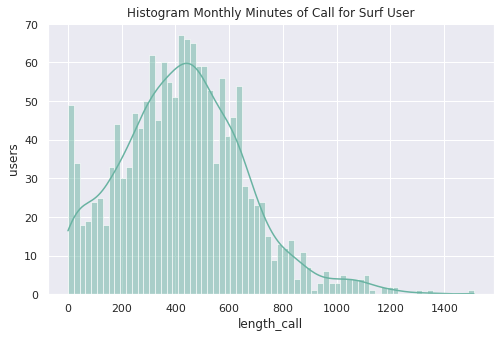

In [44]:
# Print histogram monthly call duration for surf user
hisplot(df_surf, 'length_call', 'Histogram Monthly Minutes of Call for Surf User')

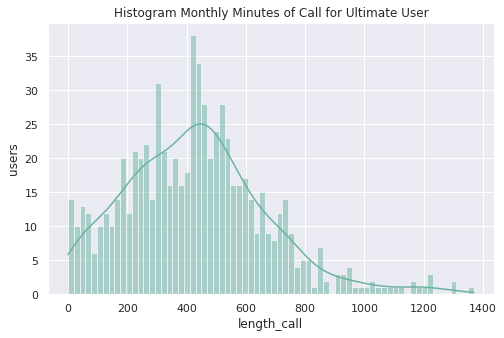

In [45]:
# Print histogram monthly call duration for ultimate user
hisplot(df_ultimate, 'length_call', 'Histogram Monthly Minutes of Call for Ultimate User')

- The minutes of calls by surf plan users and ultimate plan users are right skewed.
- Both two plans has the same shape.
- The majority of users of both two plans spent 200 to 600 minutes of call in every month.

In [46]:
# Calculate the mean and the variance of the surf plan monthly call duration

avg_monthly_call_duration_surf = df_surf['length_call'].mean()
print('Call duration Surf Mean', round(avg_monthly_call_duration_surf,2))

var_monthly_call_duration_surf = np.var(df_surf['length_call'])
print('Call duration Surf Variance', round(var_monthly_call_duration_surf,2))

std_monthly_call_duration_surf = np.sqrt(var_monthly_call_duration_surf)
print('Call duration Surf Standard Deviation', round(std_monthly_call_duration_surf,2))

Call duration Surf Mean 428.75
Call duration Surf Variance 54933.33
Call duration Surf Standard Deviation 234.38


In [47]:
# Calculate the mean and the variance of the ultimate plan monthly call duration

avg_monthly_call_duration_ultimate = df_ultimate['length_call'].mean()
print('Call duration Ultimate Mean', round(avg_monthly_call_duration_ultimate,2))

var_monthly_call_duration_ultimate = np.var(df_ultimate['length_call'])
print('Call duration Ultimate Variance', round(var_monthly_call_duration_ultimate,2))

std_monthly_call_duration_ultimate = np.sqrt(var_monthly_call_duration_ultimate)
print('Call duration Ultimate Standard Deviation', round(std_monthly_call_duration_ultimate,2))

Call duration Ultimate Mean 430.45
Call duration Ultimate Variance 57764.13
Call duration Ultimate Standard Deviation 240.34


The mean, variance, and standard deviation of call duration of both two plans have similiar values.

In [48]:
# Create boxplot function
def boxplot(a, b, c):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=a[b])
    plt.ylabel('Users')
    plt.title(c)
    plt.show()

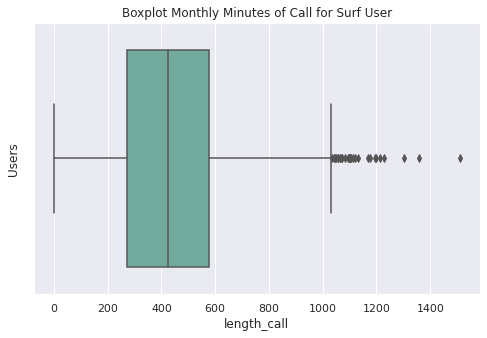

In [49]:
# Print boxplot monthly call duration for surf user
boxplot(df_surf, 'length_call', 'Boxplot Monthly Minutes of Call for Surf User')

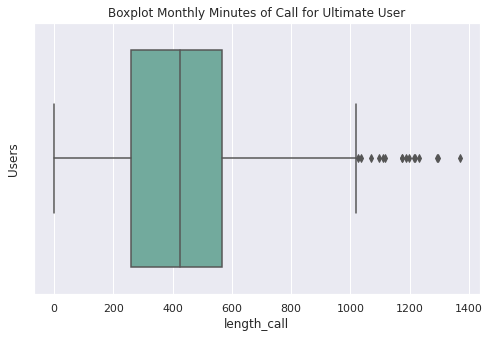

In [50]:
# Print boxplot monthly call duration for ultimate user
boxplot(df_ultimate, 'length_call', 'Boxplot Monthly Minutes of Call for Ultimate User')

There were outliers from both of the two plans when users spent over 1000 minutes of calls.

### Messages Sent

In [51]:
# Print the amount of messages sent each plan per month
message_sent_pivot = df.pivot_table(index=['plan', 'year_month'], values='num_message', aggfunc='median').reset_index()
message_sent_pivot

,plan,year_month,num_message
0,surf,2018_1,10.5
1,surf,2018_10,26.0
2,surf,2018_11,27.0
3,surf,2018_12,31.0
4,surf,2018_2,3.0
5,surf,2018_3,7.0
6,surf,2018_4,10.0
7,surf,2018_5,15.0
8,surf,2018_6,15.0
9,surf,2018_7,20.0


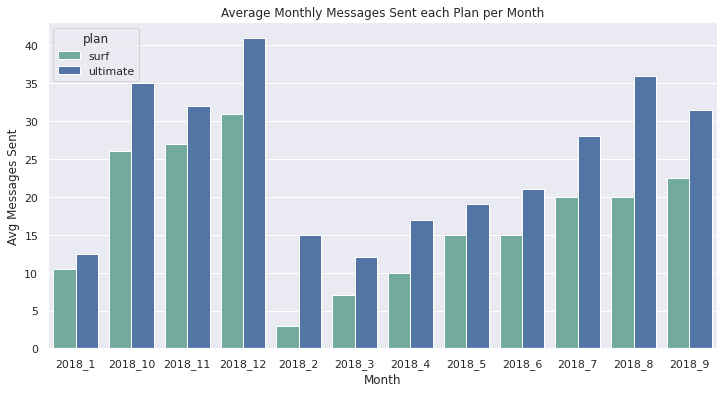

In [52]:
# Show barplot from messages sent
barplot(message_sent_pivot, 'num_message', 'Avg Messages Sent', 'Average Monthly Messages Sent each Plan per Month')

We can see based on the histogram; we get overviews:
- The histogram has increased in every single month.
- The users of the ultimate plan send more messages than users of the surf plan.

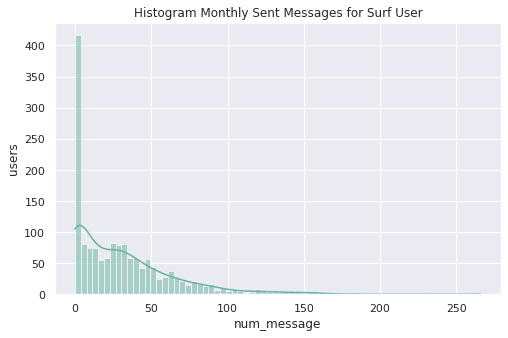

In [53]:
# Print histogram monthly messages sent for surf user
hisplot(df_surf, 'num_message', 'Histogram Monthly Sent Messages for Surf User')

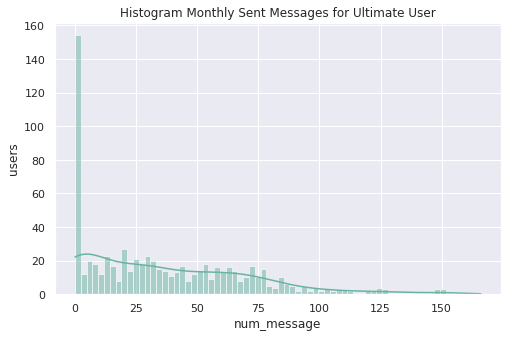

In [54]:
# Print histogram monthly messages sent for ultimate user
hisplot(df_ultimate, 'num_message', 'Histogram Monthly Sent Messages for Ultimate User')

- The average text messages histogram for both plans is highly skewed to the right
- Most of the users do not require text messages at all.
- The majority of users from both of the two plans send less than 100 messages in a month.

In [55]:
# Calculate the mean and the variance of the surf plan monthly messages sent

avg_monthly_sent_message_surf = df_surf['num_message'].mean()
print('Message sent Surf Mean', round(avg_monthly_sent_message_surf,2))

var_monthly_sent_message_surf = np.var(df_surf['num_message'])
print('Message sent Surf Variance', round(var_monthly_sent_message_surf,2))

std_monthly_sent_message_surf = np.sqrt(var_monthly_sent_message_surf)
print('Message sent Surf Standard Deviation', round(std_monthly_sent_message_surf,2))

Message sent Surf Mean 31.16
Message sent Surf Variance 1126.01
Message sent Surf Standard Deviation 33.56


In [56]:
# Calculate the mean and the variance of the the ultimate plan monthly messages sent

avg_monthly_sent_message_ultimate = df_ultimate['num_message'].mean()
print('Message sent Ultimate Mean', round(avg_monthly_sent_message_ultimate,2))

var_monthly_sent_message_ultimate = np.var(df_ultimate['num_message'])
print('Message sent Ultimate Variance', round(var_monthly_sent_message_ultimate,2))

std_monthly_sent_message_ultimate = np.sqrt(var_monthly_sent_message_ultimate)
print('Message sent Ultimate Standard Deviation', round(std_monthly_sent_message_ultimate,2))

Message sent Ultimate Mean 37.55
Message sent Ultimate Variance 1207.08
Message sent Ultimate Standard Deviation 34.74


The mean, variance, and standard deviation of the number of sent messages in both plans have similar values.

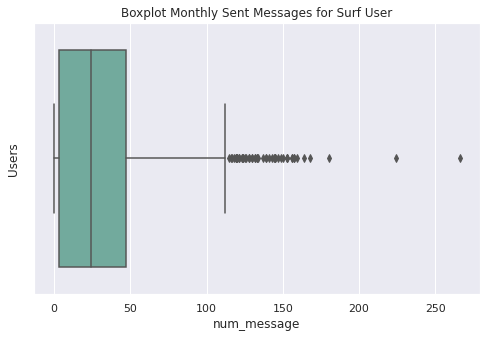

In [57]:
# Print boxplot monthly messages sent for ultimate user
boxplot(df_surf, 'num_message', 'Boxplot Monthly Sent Messages for Surf User')

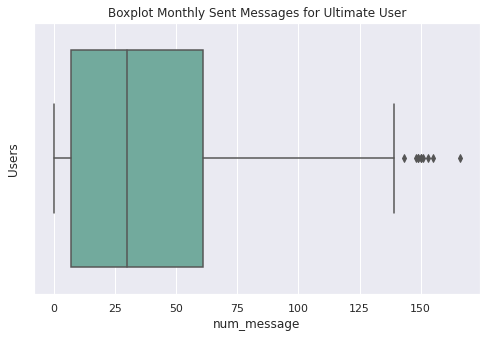

In [58]:
# Print boxplot monthly messages sent for ultimate user
boxplot(df_ultimate, 'num_message', 'Boxplot Monthly Sent Messages for Ultimate User')

- The ultimate users sent more messages in a month than surf plan users.
- Most users of the surf plan sent less than 50 messages a month, and the majority of the ultimate users sent less than 65 messages in a month.
- There are some outliers from both of the two plans when the users sends more than 120 messages in a month.

### Data Used

In [59]:
# Print the amount of data used each plan per month
data_used_pivot = df.pivot_table(index=['plan', 'year_month'], values='gb_used', aggfunc='median').reset_index()
data_used_pivot

,plan,year_month,gb_used
0,surf,2018_1,5.0
1,surf,2018_10,18.0
2,surf,2018_11,17.0
3,surf,2018_12,18.0
4,surf,2018_2,12.0
5,surf,2018_3,14.0
6,surf,2018_4,12.0
7,surf,2018_5,14.0
8,surf,2018_6,16.0
9,surf,2018_7,17.0


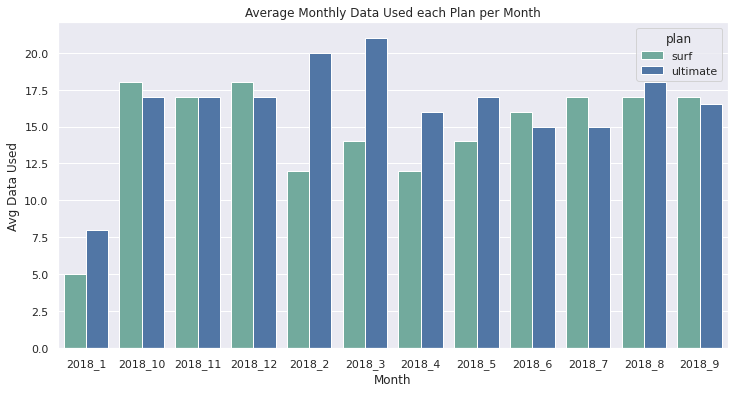

In [60]:
# Show barplot from data used
barplot(data_used_pivot, 'gb_used', 'Avg Data Used', 'Average Monthly Data Used each Plan per Month')

We can see based on the histogram; we get overviews:
- The histogram has increased in the first few months, and the histogram gets stable after half a year.
- The average users used over than 15 GB of data every month.
- One of the plans is not always be higher than the other plan.

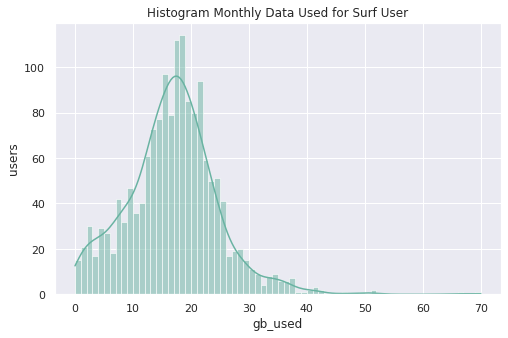

In [61]:
# Print histogram monthly Data Used for surf user
hisplot(df_surf, 'gb_used', 'Histogram Monthly Data Used for Surf User')

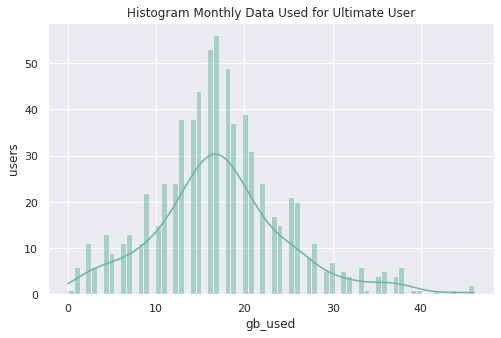

In [62]:
# Print histogram monthly Data Used for ultimate user
hisplot(df_ultimate, 'gb_used', 'Histogram Monthly Data Used for Ultimate User')

- The average internet volume histogram for both plans has a normal distribution.
- Most users need around 10 to 20 gb of data in a month.

In [63]:
# Calculate the mean and the variance of the surf plan monthly data used

avg_monthly_data_used_surf = df_surf['gb_used'].mean()
print('Data used Surf Mean', round(avg_monthly_data_used_surf,2))

var_monthly_data_used_surf = np.var(df_surf['gb_used'])
print('Data used Surf Variance', round(var_monthly_data_used_surf,2))

std_monthly_data_used_surf = np.sqrt(var_monthly_data_used_surf)
print('Data used Surf Standard Deviation', round(std_monthly_data_used_surf,2))

Data used Surf Mean 16.67
Data used Surf Variance 61.54
Data used Surf Standard Deviation 7.85


In [64]:
# Calculate the mean and the variance of the ultimate plan monthly data used

avg_monthly_data_used_ultimate = df_ultimate['gb_used'].mean()
print('Data used Ultimate Mean', round(avg_monthly_data_used_ultimate,2))

var_monthly_data_used_ultimate = np.var(df_ultimate['gb_used'])
print('Data used Ultimate Variance', round(var_monthly_data_used_ultimate,2))

std_monthly_data_used_ultimate = np.sqrt(var_monthly_data_used_ultimate)
print('Data used Ultimate Standard Deviation', round(std_monthly_data_used_ultimate,2))

Data used Ultimate Mean 17.31
Data used Ultimate Variance 58.75
Data used Ultimate Standard Deviation 7.66


The mean, variance, and standard deviation of data used in both of the two plans have similar values.

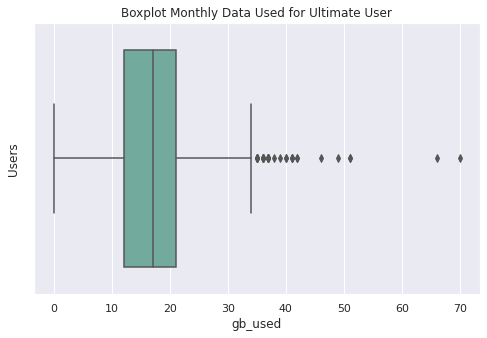

In [65]:
# Print boxplot monthly data used for surf user
boxplot(df_surf, 'gb_used', 'Boxplot Monthly Data Used for Ultimate User')

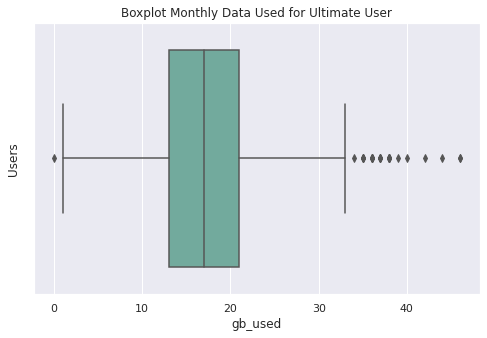

In [66]:
# Print boxplot monthly data used for ultimate user
boxplot(df_ultimate, 'gb_used', 'Boxplot Monthly Data Used for Ultimate User')

There were outliers when users use more than 30 GB of data in a month.

### Revenue

In [67]:
# Print the amount of revenue each plan per month
revenue_pivot = df.pivot_table(index=['plan', 'year_month'], values='revenue', aggfunc='mean').reset_index()
revenue_pivot

,plan,year_month,revenue
0,surf,2018_1,20.000000
1,surf,2018_10,83.832489
2,surf,2018_11,75.661131
3,surf,2018_12,96.230818
4,surf,2018_2,43.966667
5,surf,2018_3,52.456522
6,surf,2018_4,50.706000
7,surf,2018_5,63.684416
8,surf,2018_6,65.030928
9,surf,2018_7,83.765289


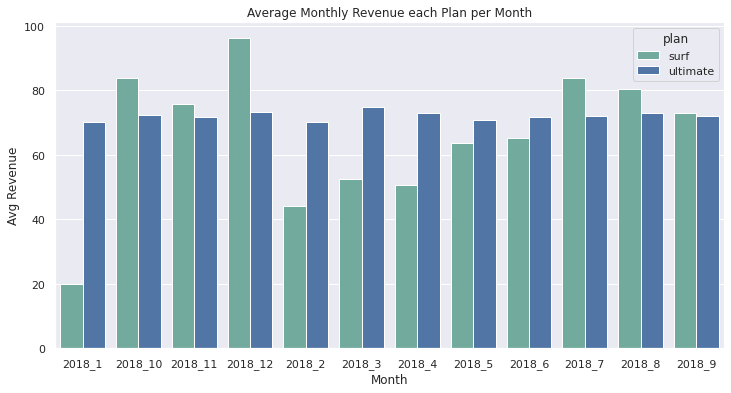

In [68]:
# Show barplot from revenue
barplot(revenue_pivot, 'revenue', 'Avg Revenue', 'Average Monthly Revenue each Plan per Month')

We can see based on the histogram; we get overviews:
- The histogram has increased in the first few months, and the histogram gets stable after half a year.
- The average users from the surf plan are paying extra for their bill.

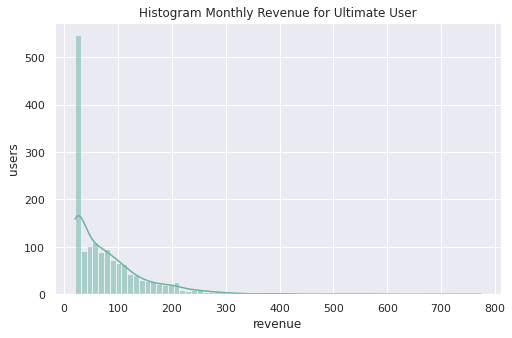

In [69]:
# Print histogram monthly revenue for surf user
hisplot(df_surf, 'revenue', 'Histogram Monthly Revenue for Ultimate User')

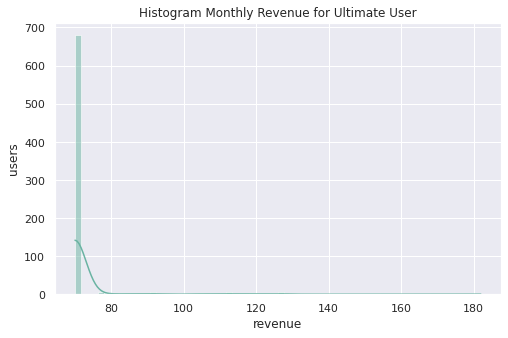

In [70]:
# Print histogram monthly revenue for ultimate user
hisplot(df_ultimate, 'revenue', 'Histogram Monthly Revenue for Ultimate User')

- Average revenue histogram for both plans are skewed to the right.

In [71]:
# Calculate the mean and the variance of the surf plan monthly revenue

avg_monthly_revenue_surf = df_surf['revenue'].mean()
print('Monthly Revenue Surf Mean', round(avg_monthly_revenue_surf,2))

var_monthly_revenue_surf = np.var(df_surf['revenue'])
print('Monthly Revenue Surf Variance', round(var_monthly_revenue_surf,2))

std_monthly_revenue_surf = np.sqrt(var_monthly_revenue_surf)
print('Monthly Revenue Surf Standard Deviation', round(std_monthly_revenue_surf,2))

Monthly Revenue Surf Mean 79.19
Monthly Revenue Surf Variance 5393.39
Monthly Revenue Surf Standard Deviation 73.44


In [72]:
# Calculate the mean and the variance of the ultimate plan monthly revenue

avg_monthly_revenue_ultimate = df_ultimate['revenue'].mean()
print('Monthly Revenue Ultimate Mean', round(avg_monthly_revenue_ultimate,2))

var_monthly_revenue_ultimate = np.var(df_ultimate['revenue'])
print('Monthly Revenue Ultimate Variance', round(var_monthly_revenue_ultimate,2))

std_monthly_revenue_ultimate = np.sqrt(var_monthly_revenue_ultimate)
print('Monthly Revenue Ultimate Standard Deviation', round(std_monthly_revenue_ultimate,2))

Monthly Revenue Ultimate Mean 72.31
Monthly Revenue Ultimate Variance 129.67
Monthly Revenue Ultimate Standard Deviation 11.39


- The mean from both two plans has a similar value.
- The variance of the surf plan is very higher than the ultimate plan.
- The standard deviation from the surf plan is higher than the ultimate plan.

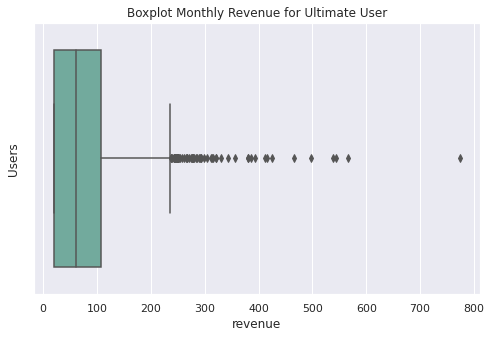

In [73]:
# Print boxplot monthly revenue for surf user
boxplot(df_surf, 'revenue', 'Boxplot Monthly Revenue for Ultimate User')

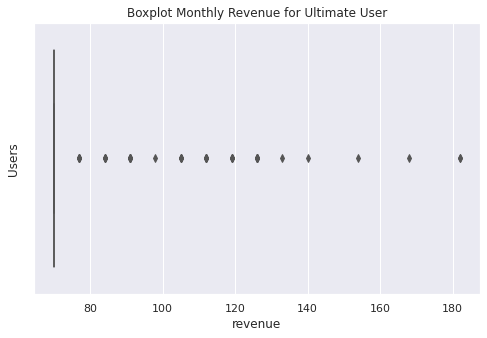

In [74]:
# Print boxplot monthly revenue for ultimate user
boxplot(df_ultimate, 'revenue', 'Boxplot Monthly Revenue for Ultimate User')

- There are outliers from the surf plan when the users spend more than \\$200 in a month.
- The ultimate users had a lot of outliers when their spent more than \\$70 in a month.

## Test statistical hyposthesis

- The average income of users of Ultimate and Surf phone plans is different.
- The average income of users in the NY-NJ area differs from that of users from other regions.

**Hypothesis :**
- H₀ : Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf tidak berbeda.


- H₁ : Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda.


Alpha value - 5%

Untuk menentukan `equal_var` True atau False kita akan menggunakan **Levene Test**, dimana jika nilai `p=value` lebih dari `0.05` maka bisa kita asumsikan bahwa kedua sampel memiliki `equal variance`, kita juga menetapkan argumen `median` pada fungsi center karena seperti yang kita ketahui pada diagram kedua paket miring ke kanan.

In [75]:
# Determine if the two samples have equal variance
plans_var_levene = st.levene(df_surf['revenue'], df_ultimate['revenue'], center='median')
plans_var_levene

LeveneResult(statistic=503.8417210298855, pvalue=5.007275040112501e-101)

Nilai `p-value` dari paket Surf dan paket Ultimate menghasilkan angka `5.0` yang artinya `equal`.

In [76]:
# Test the hypothesis

alpha = 0.05
results = st.ttest_ind(df_surf['revenue'], df_ultimate['revenue'], equal_var=True)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.012527223379083177
We reject the null hypothesis


Hasil dari uji-t yang kita lakukan adalah menolak Hipotesis 0 yang artinya bahwa rata-rata pendapatan dari kedua paket berbeda atau tidak sama. Jadi kita bisa mengajukan kepada departemen marketing untuk bisa menerapkan strategi iklan yang berbeda pada kedua paket tersebut.

In [77]:
# Filter City by New York and New Jersey
df_ny_nj = df[df['city'].str.contains('NY-NJ')].reset_index(drop=True)
df_ny_nj.head()

,user_id,year_month,length_call,num_call,num_message,gb_used,city,reg_date,plan,churn_date,revenue
0,1014,2018_11,163.0,23.0,9.0,2.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaT,20.0
1,1014,2018_12,1114.0,125.0,64.0,8.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,NaT,208.4
2,1022,2018_10,574.0,69.0,0.0,19.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,82.2
3,1022,2018_11,498.0,61.0,0.0,22.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,90.0
4,1022,2018_12,585.0,62.0,0.0,18.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07,75.5


In [78]:
# Filter city other of New York and New Jersey
df_city_other = df[~df['city'].str.contains('NY-NJ')].reset_index(drop=True)
df_city_other.head()

,user_id,year_month,length_call,num_call,num_message,gb_used,city,reg_date,plan,churn_date,revenue
0,1000,2018_12,124.0,16.0,11.0,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,70.0
1,1001,2018_10,393.0,47.0,53.0,22.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,90.9
2,1001,2018_11,426.0,49.0,36.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,60.0
3,1001,2018_12,412.0,46.0,44.0,19.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,60.0
4,1001,2018_8,182.0,22.0,30.0,7.0,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,20.0


In [79]:
# Memeriksa kolom city
df_ny_nj['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA    377
Name: city, dtype: int64

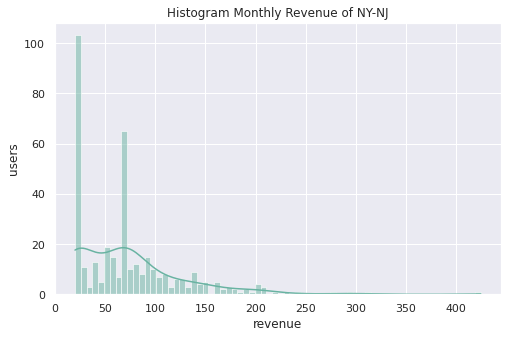

In [80]:
# Print histogram monthly revenue for NY-NJ
hisplot(df_ny_nj, 'revenue', 'Histogram Monthly Revenue of NY-NJ')

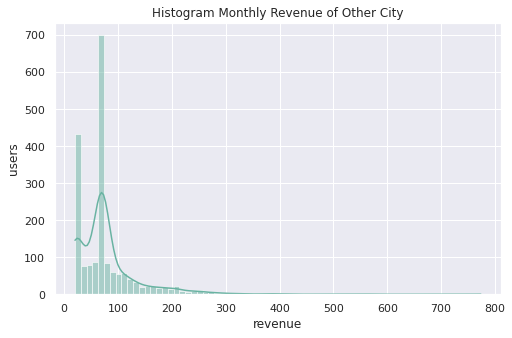

In [81]:
# Print histogram monthly revenue for Other City
hisplot(df_city_other, 'revenue', 'Histogram Monthly Revenue of Other City')

In [82]:
# Calculate the mean and the variance of the NY-NJ users

avg_ny_nj = df_ny_nj['revenue'].mean()
print('NY-NJ mean:', round(avg_ny_nj,2))

var_ny_nj = np.var(df_ny_nj['revenue'])
print('NY-NJ var:', round(var_ny_nj,2))

std_ny_nj = np.sqrt(var_ny_nj)
print('NY-NJ std', round(std_ny_nj,2))

NY-NJ mean: 72.77
NY-NJ var: 3030.55
NY-NJ std 55.05


In [83]:
# Calculate the mean and the variance of the NY-NJ users

avg_other_city = df_city_other['revenue'].mean()
print('Other city mean:', round(avg_other_city,2))

var_other_city = np.var(df_city_other['revenue'])
print('Other city var:', round(var_other_city,2))

std_other_city = np.sqrt(var_ny_nj)
print('Other city std', round(std_other_city,2))

Other city mean: 77.87
Other city var: 3888.23
Other city std 55.05


**Hypothesis :**

- H₀ : Rata-rata pendapatan dari pengguna di wilayah NY-NJ tidak berbeda dengan pendapatan pengguna dari wilayah lain.
- H₁ : Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain.

Alpha value - 5%

Untuk menentukan `equal_var` True atau False kita akan menggunakan **Levene Test**, dimana jika nilai `p=value` lebih dari `0.05` maka bisa kita asumsikan bahwa kedua sampel memiliki `equal variance`, kita juga menetapkan argumen `median` pada fungsi center karena seperti yang kita ketahui pada diagram kedua dataframe miring ke kanan.

In [84]:
# Determine if the two samples have equal variance
city_var_levene = st.levene(df_ny_nj['revenue'], df_city_other['revenue'], center='median')
city_var_levene

LeveneResult(statistic=1.605948909791642, pvalue=0.20519099467846455)

Nilai rasio varians dari NY-NJ dan kota lain menghasilkan angka `1.2` maka kita akan mengatur variable `equal_var` menjadi True.

In [85]:
# Test the hypothesis

alpha = 0.05
results = st.ttest_ind(df_ny_nj['revenue'], df_city_other['revenue'], equal_var=True)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.13964054821036712
We can't reject the null hypothesis


Dari uji-t yang kita lakukan menghasilkan bahwa kita tidak dapat menolak Hipotesis 0, yang artinya rata-rata pendapatan dari kota NY-NJ dan kota lainnya adalah sama, jadi kita dapat merekomendasikan untuk menerapkan strategi iklan yang sama pada setiap kota.

# Conclusion

We have done some steps in processing the mobile plan data to get conclusions:

**1. Preprocessing Data**
- We have five datasets, and each data contains some information about the users using our service. That 5 dataset includes the information of 500 users using the service, minutes of call they spent, number of messages they sent, total data they used, and the information about the price of each plan.
- There are some missing values in the data but to fill the missing values isn't always needed.
- We have to convert some columns, especially the column with the object type, to the timestamp format to make it easier for us to do the following analysis.

**2. Transformation Data**
- We created new columns like the month based on the date columns in the calls, messages, and internet dataset to calculate the amount of traffic from each user every month.
- We created the function to calculate the revenue from each user every month, applied the process, and created a new column called revenue.

**3. Visualisation and Analysis**
- The calling behaviour from users of each plan is very similar.
- The ultimate users sent more messages than surf plan users, but there is no significant difference between the two plans. Kebanyakan pengguna tidak menggunakan kuota pesan mereka sama sekali, hal ini mungkin terjadi karena mereka lebih memilih menggunakan aplikasi pesan instan dengan internet, kita bisa menyarankan untuk mengubah kuota sms menjadi kuota aplikasi instant messaging.
- The usage of the internet for ultimate plan users is slightly higher than users of the surf plan, but the variance of the users from ultimate plan is less than the surf plan users.
- The users from surf plans brought in more revenue than ultimate plans, it's because the number of ultimate programs users is more than the surf plans users.

**4. Test the Hypothesis**
- Hasil dari analisis yang telah kita lakukan menetapkan bahwa rata-rata pendapatan dari surf plan dan ultimate plan bebeda, hal ini tentu terlalu mengejutkan karena kita melihat ada sebagian pengguna pada paket surf membayar ekstra untuk tagihan mereka untuk kelebihan penggunaan, dengan hasil ini tentu akan menjadi pertimbangan bagi departemen marketing dalam menyesuaikan budget iklan pada setiap paket.
- Hasil analisis lain juga menetapkan bahwa pendapatan rata-rata dari pengguna di NY-NJ dan kota lainnya tidak berbeda, dengan hasil ini tentu akan menjadi pertimbangan bagi departemen marketing dalam menyesuaikan budget iklan pada satu kota dan kota lainnya, yang artinya kita bisa merekomendasikan departemen periklanan untuk tidak perlu membeda-bedakan anggaran iklan pada setiap kota.

Kita bisa merekomendasikan bagi pengguna yang sering mengalami kelebihan penggunaan untuk meng-upgrade paket mereka, atau jika jumlah mereka cukup banyak kita bisa mempertimbangkan untuk menambah paket baru sebagai opsi diantara paket surf dan paket ultimate.